In [46]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
import re

In [14]:
df = pd.read_csv("/content/drive/MyDrive/motivational_vs_depression_quotes.csv")

In [15]:
df

,quotes,label
0,Age is an issue of mind over matter. If you do...,1
1,"Anyone who stops learning is old, whether at t...",1
2,Wrinkles should merely indicate where smiles h...,1
3,True terror is to wake up one morning and disc...,1
4,A diplomat is a man who always remembers a wom...,1
...,...,...
554,Shakespeare himself never described this tortu...,0
555,I had stopped composing; my mind seemed to bec...,0
556,I did nothing.,0
557,One power was left to me-to suffer.,0


In [16]:
df.isna().sum()

quotes    1
label     0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df

,quotes,label
0,Age is an issue of mind over matter. If you do...,1
1,"Anyone who stops learning is old, whether at t...",1
2,Wrinkles should merely indicate where smiles h...,1
3,True terror is to wake up one morning and disc...,1
4,A diplomat is a man who always remembers a wom...,1
...,...,...
553,It is difficult to put into words what I suffe...,0
554,Shakespeare himself never described this tortu...,0
555,I had stopped composing; my mind seemed to bec...,0
556,I did nothing.,0


In [19]:
df.shape

(558, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quotes  558 non-null    object
 1   label   558 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [21]:
df['label'].value_counts()

1    280
0    278
Name: label, dtype: int64

In [26]:
# downloading nltk dependencies
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

nltk.download('punkt')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
from nltk.stem import WordNetLemmatizer

In [63]:
y = df['label']

y = y.to_numpy()

type(y)

numpy.ndarray

In [27]:
all_stopwords = stopwords.words('english')
negation = ['no','not']

all_stopwords = [ w for w in all_stopwords if w not in negation]

In [29]:
lemma = WordNetLemmatizer()

In [47]:
def preprocessing(data):
  corpus = []
  for i in range(len(data)):
    review = data.iloc[i].lower()
    review = re.sub(r'\d+', ' ', review)
    review = review.split(' ')

    review = [lemma.lemmatize(word) for word in review if word not in all_stopwords ]
    review = ' '.join(review)
    corpus.append(review)
  return corpus



In [48]:
review = preprocessing(df['quotes'])

In [49]:
df['quotes']

0      Age is an issue of mind over matter. If you do...
1      Anyone who stops learning is old, whether at t...
2      Wrinkles should merely indicate where smiles h...
3      True terror is to wake up one morning and disc...
4      A diplomat is a man who always remembers a wom...
                             ...                        
553    It is difficult to put into words what I suffe...
554    Shakespeare himself never described this tortu...
555    I had stopped composing; my mind seemed to bec...
556                                       I did nothing.
557                  One power was left to me-to suffer.
Name: quotes, Length: 558, dtype: object

In [ ]:
review

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(review).toarray()
X = X.astype(float)

In [61]:
X.dtype

dtype('float64')

In [68]:
X.shape

(558, 2110)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,
                                                 random_state=42)

In [66]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [69]:
INPUT_DIM = X.shape[1]
# NUMBER OF FEATURES

In [75]:
model_1 = Sequential()
model_1.add(Dense(32,input_dim = INPUT_DIM,activation='relu'))
model_1.add(Dense(1,activation = 'sigmoid'))

In [76]:
model_1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [77]:
model1_history = model_1.fit(X_train,y_train,validation_split=0.20,epochs=100,batch_size=10)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.6872 - accuracy: 0.6976 - val_loss: 0.6836 - val_accuracy: 0.6905
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.8743 - val_loss: 0.6662 - val_accuracy: 0.7262
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.9760 - val_loss: 0.6354 - val_accuracy: 0.7500
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.9820 - val_loss: 0.5972 - val_accuracy: 0.7381
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4263 - accuracy: 1.0000 - val_loss: 0.5533 - val_accuracy: 0.7857
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 1.0000 - val_loss: 0.5120 - val_accuracy: 0.8333
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 1.0000 - val_loss: 0.4770 - val_accuracy: 0.8095
Epoch 8/100
3

In [80]:
import matplotlib.pyplot as plt
def accuracy(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title(f"{model}  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


def loss_plot(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title(f"{model} Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


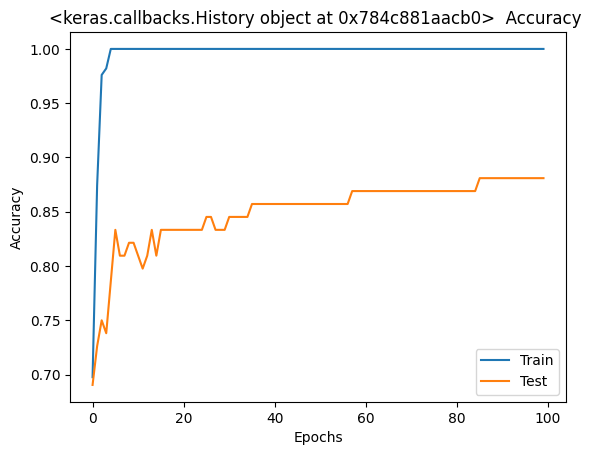

In [81]:
accuracy(model1_history)

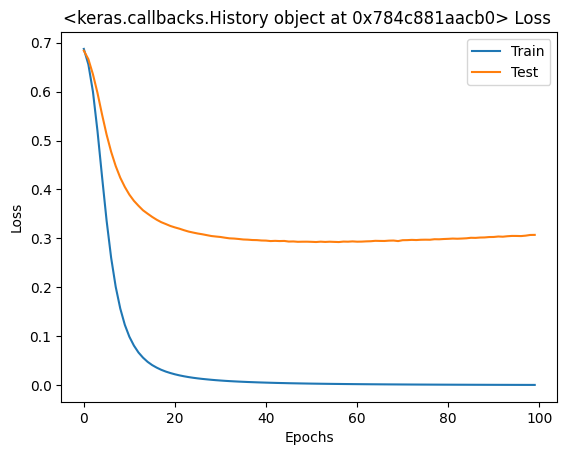

In [83]:
loss_plot(model1_history)

In [94]:
! pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.0 MB/s eta 0:00:00


In [95]:
from kerastuner.tuners import RandomSearch

<ipython-input-95-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [84]:
nodes = [6,8,32,64,128,256,512,1024]

In [96]:
# Define the power range for the step sizes
power_range = range(2, 11)  # From 2^2 = 4 to 2^10 = 1024

# Generate the step sizes as powers of 2 and store them in a list
step_sizes = [pow(2, power) for power in power_range]

print(step_sizes)


[4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [102]:
def model_building(hp):
  model_dnn = Sequential()
  model_dnn.add(Dense(units = hp.Int('units',
                                     min_value=32,
                                     max_value =1024,
                                     step =128),input_dim = INPUT_DIM,activation='relu'))
  model_dnn.add(Dense(1,activation = 'sigmoid'))
  model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model_dnn

In [99]:
# ! mkdir mydir

In [121]:
tuner = RandomSearch(model_building,
                     objective = 'accuracy',
                     max_trials = 5,
                     executions_per_trial = 3,
                     directory = 'mydir',
                     project_name = 'dnn_model')

In [107]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 128, 'sampling': 'linear'}


In [108]:
tuner.search(X_train,y_train,epochs=5)

Trial 5 Complete [00h 00m 06s]
accuracy: 1.0

Best accuracy So Far: 1.0
Total elapsed time: 00h 00m 17s


In [ ]:
tuner.results_summary()

In [ ]:
best_hp = tuner.get_best_hyperparameters

In [113]:
best_hp = tuner.get_best_hyperparameters(1)[0]

In [114]:
model_hp = tuner.hypermodel.build(best_hp)

In [118]:
model_hp_history = model_hp.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the final model on the test set
test_loss, test_accuracy = model_hp.evaluate(X_test, y_test)


Epoch 1/100
14/14 [==============================] - 0s 4ms/step - loss: 1.8513e-04 - accuracy: 1.0000
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.8165e-04 - accuracy: 1.0000
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 1.7775e-04 - accuracy: 1.0000
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.7493e-04 - accuracy: 1.0000
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.7132e-04 - accuracy: 1.0000
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6798e-04 - accuracy: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6466e-04 - accuracy: 1.0000
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6153e-04 - accuracy: 1.0000
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5855e-04 - accuracy: 1.0000
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss:

In [117]:
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8357142806053162


KeyError: ignored

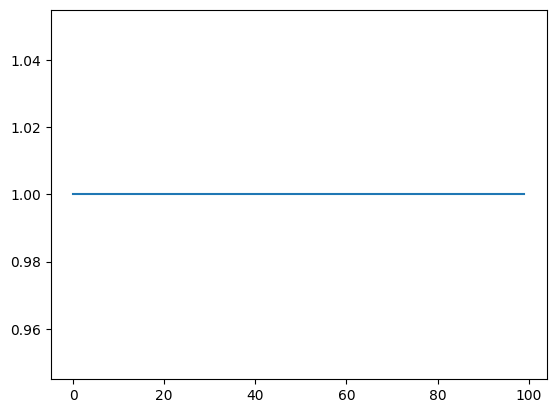

In [119]:
accuracy(model_hp_history)